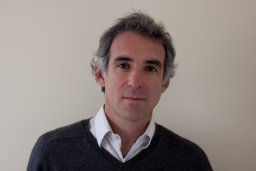
# Martin Abadi

# TensorFlow: Large-Scale Machine Learning on Heterogeneous Distributed Systems

# https://arxiv.org/pdf/1603.04467

## Abstract

The paper introduces **TensorFlow**, a machine learning system based on a **dataflow graph programming model** designed to unify research experimentation and large-scale production deployment. TensorFlow allows a single computational specification to be executed efficiently across heterogeneous hardware platforms, from mobile devices to distributed clusters with thousands of CPUs and GPUs. The work presents the programming abstraction, system architecture, optimization strategies, and extensions that enable TensorFlow to scale reliably while remaining flexible for diverse machine learning workloads.

---

## Problems

### Lack of a Unified ML System Across Scales
Prior machine learning pipelines often relied on distinct systems for research prototyping, large-scale training, and production deployment, resulting in duplicated implementations and high maintenance cost.

### Limited Scalability of Existing Frameworks
Many early neural network frameworks were optimized for single-machine execution and did not scale effectively to distributed environments.

### Difficulty Mapping Computation to Heterogeneous Hardware
Efficient utilization of CPUs, GPUs, and distributed accelerators required manual partitioning and system-specific engineering.

### Rigid Parameter-Server Architectures
Specialized parameter-server designs constrained model structure and complicated coordination between computation and parameter updates.

### Insufficient System-Level Optimization
Large computation graphs introduced challenges in scheduling, memory management, communication overhead, and fault tolerance.

---

## Proposed Solutions

### Dataflow Graph Programming Model
Computation is represented as a directed graph of operations, enabling global optimization, parallel scheduling, and distributed execution.

### Unified Execution Model Across Devices
The same graph can execute on a single device, multiple devices, or across distributed clusters with minimal modification.

### Stateful Variables Within the Graph
Model parameters are represented as mutable variables inside the graph, removing reliance on external parameter servers.

### Graph-Based Automatic Differentiation
Gradients are computed via graph transformations using the chain rule, enabling scalable training of deep neural networks.

### Flexible Parallelism Strategies
The system supports synchronous and asynchronous data parallelism, model parallelism, and pipelined execution within a unified framework.

---

## Purpose

The purpose of the paper is to present TensorFlow as a **general-purpose, scalable machine learning system** that unifies experimentation, training, and deployment under a single abstraction, thereby reducing engineering overhead while enabling production-grade machine learning at scale.

---

## Methodology

### Programming Model
Stateful dataflow graphs with:
- Explicit control dependencies  
- Mutable variables  
- Control-flow operators (conditionals and loops)

### System Architecture
A **client–master–worker** architecture supporting both local and distributed execution.

### Device Placement
Automated graph partitioning and device placement using cost models for computation and communication.

### Distributed Execution
Explicit `Send` and `Receive` nodes manage communication across devices and machines.

### Optimizations
- Common subexpression elimination  
- Graph scheduling to reduce peak memory usage  
- Asynchronous kernel execution  
- Optimized numerical libraries (BLAS, cuDNN, Eigen)  
- Lossy compression for inter-device communication  

### Tooling
TensorBoard for graph visualization, summaries, and performance diagnostics.

---

## Results

- TensorFlow supports workloads ranging from mobile inference to distributed training on hundreds of machines.  
- Migration of large models (e.g., Inception) from DistBelief achieved reported speedups of up to $$6\times$$.  
- The system demonstrated robustness in production, supporting hundreds of deployed machine learning applications.  
- The architecture enabled experimentation with different parallelism and consistency strategies without redesign.

---

## Conclusions

TensorFlow provides a **scalable, flexible, and production-ready** machine learning framework built around a dataflow graph abstraction. By unifying model specification, automatic differentiation, device placement, and distributed execution, TensorFlow significantly narrows the gap between research prototypes and real-world deployment. The paper establishes TensorFlow as both a research platform and an industrial-strength system, forming the foundation for large-scale machine learning infrastructure.


## 1. Tensors (Multidimensional Arrays)

### Concept
A **tensor** is a typed, multidimensional array.

### Mathematical Form
A tensor is an element of
$$
T \in \mathbb{R}^{n_1 \times n_2 \times \cdots \times n_k}.
$$

### Role in the Paper
- Tensors are the fundamental mathematical objects flowing along the edges of TensorFlow computation graphs.  
- All model parameters, inputs, outputs, gradients, and intermediate values are tensors.  
- TensorFlow generalizes vectors and matrices to arbitrary dimensions to support modern deep learning workloads.

---

## 2. Dataflow Graphs as Mathematical Computation

### Concept
A computation is represented as a **directed graph**:
- Nodes represent operations (functions).
- Edges represent tensors (data dependencies).

### Mathematical Interpretation
A dataflow graph encodes a composition of functions:
$$
y = f_n \circ f_{n-1} \circ \cdots \circ f_1(x).
$$

### Role in the Paper
- Enables global reasoning about computation, scheduling, memory usage, and parallelism.  
- Makes it possible to optimize execution across heterogeneous devices and distributed systems.

---

## 3. Linear Algebra Operations

### Core Operations
- Matrix multiplication:
$$
Y = WX + b
$$
- Elementwise addition and multiplication  
- Convolution  
- Pooling  
- Activation functions (ReLU, sigmoid, softmax)

### Role in the Paper
- These operations form the mathematical backbone of neural networks.  
- TensorFlow implements them efficiently on CPUs and GPUs using optimized numerical libraries.

---

## 4. Automatic Differentiation (Gradient Computation)

### Concept
TensorFlow supports **automatic differentiation** to compute gradients of a scalar loss with respect to parameters.

### Mathematical Objective
Given a loss function
$$
C = L(\theta),
$$
TensorFlow computes the gradient
$$
\nabla_\theta C =
\left(
\frac{\partial C}{\partial \theta_1},
\ldots,
\frac{\partial C}{\partial \theta_n}
\right).
$$

### Mechanism
- Uses **reverse-mode differentiation**.  
- Applies the chain rule along the computation graph:
$$
\frac{dC}{dx} = \frac{dC}{dy} \cdot \frac{dy}{dx}.
$$

### Role in the Paper
- Essential for training neural networks using gradient-based optimization.  
- Gradients are constructed by augmenting the original computation graph with gradient nodes.

---

## 5. Partial Derivatives and Zero Gradients

### Concept
If an output does not depend on an input, its derivative is zero.

### Mathematical Rule
If the cost \( C \) does not depend on \( y_1 \), then
$$
\frac{\partial C}{\partial y_1} = 0.
$$

### Role in the Paper
- Ensures correct gradient propagation when operations have multiple outputs.  
- Avoids unnecessary computation and preserves mathematical correctness.

---

## 6. Gradient-Based Optimization

### Concept
Training relies on stochastic gradient descent (SGD) and its variants.

### Mathematical Update Rule
$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta C.
$$

### Role in the Paper
- TensorFlow introduces no new optimization algorithms.  
- It provides infrastructure to compute and apply gradients efficiently at scale, either synchronously or asynchronously.

---

## 7. Parallelism and Mathematical Equivalence

### Data Parallelism
Each replica computes a local gradient:
$$
\nabla_\theta C_i.
$$
Gradients are then combined:
$$
\nabla_\theta C = \frac{1}{N} \sum_{i=1}^{N} \nabla_\theta C_i.
$$

### Model Parallelism
Different components of a function are computed on different devices:
$$
f(x) = f_3\bigl(f_2(f_1(x))\bigr).
$$

### Role in the Paper
- Demonstrates that mathematically identical training can be achieved with different execution strategies.  
- Preserves correctness while improving throughput and scalability.

---

## 8. Control Flow and Iterative Computation

### Concept
TensorFlow supports loops and conditionals within computation graphs.

### Mathematical Meaning
- While-loops represent iterative processes:
$$
x_{t+1} = g(x_t).
$$
- Conditionals represent piecewise-defined functions.

### Role in the Paper
- Enables representation of recurrent neural networks and iterative optimization algorithms.  
- Gradient computation must account for the executed control-flow path and iteration count.

---

## 9. Scheduling and Critical Path Analysis

### Concept
Execution order affects performance and memory usage.

### Mathematical Tool
- ASAP / ALAP scheduling from operations research.  
- Identification of critical paths in directed graphs.

### Role in the Paper
- Used to delay communication or computation until mathematically necessary.  
- Reduces peak memory usage without altering numerical results.

---

## 10. Numerical Precision and Lossy Compression

### Concept
Reduced-precision arithmetic is used during communication.

### Mathematical Model
A value is perturbed by bounded noise:
$$
\tilde{x} = x + \varepsilon,
\qquad |\varepsilon| \ll |x|.
$$

### Role in the Paper
- Reduces communication overhead in distributed training.  
- Trades small numerical error for substantial system-level efficiency gains.

---

## 11. Reference Counting and Memory Reuse

### Concept
Tensors are deallocated immediately when no longer referenced.

### Mathematical Relevance
- Enables larger feasible tensor dimensions and batch sizes.  
- Prevents memory blow-up that would otherwise constrain large optimization problems.

---

## 12. Performance Metrics (Quantitative Content)

### Metrics Mentioned
- Training speed  
- Inference throughput  
- Parameter scale (e.g., billions of parameters)  
- Operation counts (e.g., billions of multiply–add operations)

### Role in the Paper
- Demonstrates the feasibility of executing mathematically complex models at industrial scale.  
- Serves as empirical validation rather than statistical hypothesis testing.

---

## Overall Mathematical Perspective

The paper introduces **no new mathematical theory or learning algorithms**. Its contribution lies in:
- Providing a formal computational representation (dataflow graphs) for established mathematics,  
- Enabling correct large-scale execution of linear algebra, calculus, and optimization, and  
- Preserving mathematical equivalence across heterogeneous and distributed systems.

In essence, TensorFlow is a **mathematical execution system**, not a new mathematical model. Its novelty lies in how classical mathematics is represented, differentiated, scheduled, and scaled reliably.


## Structured Review of Research Gaps and Contributions

| Key Problem / Research Gap | How This Limited Prior Work | Proposed Solution in This Paper |
|---------------------------|-----------------------------|---------------------------------|
| Fragmented machine learning systems across research and production | Separate frameworks were often required for experimentation, large-scale training, and deployment, increasing maintenance cost and reducing reproducibility | Introduces a unified dataflow-based system that supports research, training, and deployment within a single framework |
| Limited scalability of existing neural network frameworks | Many prior systems were designed primarily for single-machine execution and did not scale efficiently to clusters with hundreds of devices | Designs TensorFlow to execute computation graphs seamlessly on single machines and large distributed clusters |
| Inflexible parameter-server architectures | External parameter servers imposed rigid designs, complicating model specification and limiting algorithmic flexibility | Represents parameters as stateful variables within the computation graph itself, eliminating the need for separate parameter-server subsystems |
| Difficulty exploiting heterogeneous hardware | Prior systems required significant manual effort to adapt models to CPUs, GPUs, and specialized accelerators | Uses a device-agnostic dataflow graph with automatic node placement across heterogeneous hardware |
| High communication overhead in distributed training | Inefficient data transfer between devices and machines degraded scalability and performance | Introduces explicit Send/Receive nodes and graph partitioning to isolate and optimize communication |
| Lack of integrated support for multiple parallelism strategies | Data parallelism, model parallelism, and pipelining often required different systems or ad hoc implementations | Provides native support for synchronous/asynchronous data parallelism, model parallelism, and pipelined execution within one graph abstraction |
| Limited global optimization of computation | Local execution models prevented system-wide scheduling and memory optimizations | Enables global graph-level optimizations such as common subexpression elimination and critical-path-aware scheduling |
| Inefficient memory usage for large graphs | Large intermediate tensors increased peak memory usage, limiting feasible model size | Applies graph scheduling, control dependencies, and memory-aware execution to reduce peak memory consumption |
| Insufficient fault tolerance in distributed execution | Failures in distributed systems often required manual recovery or complex external tooling | Supports checkpointing and recovery of graph state via variable save and restore operations |
| Weak tooling for model introspection at scale | Debugging and understanding large computation graphs was difficult and error-prone | Introduces TensorBoard for graph visualization, summaries, and performance analysis |
| Limited abstraction for control flow in ML models | Many frameworks could not naturally express loops and conditionals | Extends dataflow graphs with explicit control-flow operators supporting iteration and conditionals |
| Unclear path from system design to real-world validation | Claims of scalability were often theoretical or limited to small benchmarks | Demonstrates successful deployment across numerous large-scale production systems |

---

## Summary Insight

The paper positions TensorFlow as a **general-purpose, scalable execution system for machine learning** that closes the gap between research flexibility and production robustness. Its primary contribution lies not in new learning algorithms, but in **reframing machine learning computation as a stateful, globally optimizable dataflow graph**. This design enables mathematically standard models—based on linear algebra, calculus, and optimization—to scale reliably across heterogeneous hardware and distributed environments while maintaining correctness and reproducibility.


## Related Work Extracted from the TensorFlow Reference Section

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---------|------|-------|-------|--------------------------|
| Dean et al. | 2012 | *Large Scale Distributed Deep Networks* | NeurIPS | Describes DistBelief, TensorFlow’s predecessor; motivates the need for a more flexible and unified machine learning system |
| Bengio et al. | 2013 | *Representation Learning: A Review and New Perspectives* | IEEE TPAMI | Provides theoretical motivation for deep learning workloads that TensorFlow aims to support at scale |
| LeCun, Bengio & Hinton | 2015 | *Deep Learning* | Nature | Establishes the central importance of deep neural networks, motivating scalable machine learning infrastructure |
| Jia et al. | 2014 | *Caffe: Convolutional Architecture for Fast Feature Embedding* | arXiv | Example of a high-performance but relatively rigid static framework compared to TensorFlow |
| Collobert et al. | 2011 | *Torch7: A MATLAB-like Environment for Machine Learning* | NeurIPS | Illustrates early tensor-based machine learning systems influencing TensorFlow’s numerical abstractions |
| Bergstra et al. | 2010 | *Theano: A CPU and GPU Math Compiler in Python* | SciPy Conference | Foundational symbolic graph-based framework that inspired TensorFlow’s dataflow computation model |
| Seide & Agarwal | 2016 | *CNTK: Microsoft’s Open-Source Deep-Learning Toolkit* | KDD | Representative large-scale deep learning system emphasizing performance and scalability |
| Low et al. | 2012 | *Distributed GraphLab* | VLDB | Influences TensorFlow’s distributed graph execution and scheduling concepts |
| Gonzalez et al. | 2012 | *PowerGraph: Distributed Graph-Parallel Computation* | OSDI | Provides ideas for graph partitioning and large-scale distributed execution used in TensorFlow |
| Zaharia et al. | 2010 | *Spark: Cluster Computing with Working Sets* | HotCloud | Motivates scalable cluster computing abstractions relevant to TensorFlow’s execution model |
| Recht et al. | 2011 | *Hogwild: A Lock-Free Approach to Parallelizing SGD* | NeurIPS | Motivates asynchronous optimization strategies supported by TensorFlow |
| Chetlur et al. | 2014 | *cuDNN: Efficient Primitives for Deep Learning* | arXiv | Provides optimized GPU kernels leveraged by TensorFlow for high-performance numerical computation |
| Abadi et al. | 2016 | *TensorFlow: A System for Large-Scale Machine Learning* | OSDI | Extended, peer-reviewed system paper reinforcing TensorFlow’s core architectural and design claims |

---

## Synthesis

The related work reflects three major lines of influence:

1. **Deep learning frameworks** (Theano, Caffe, Torch), which established tensor-based computation and graph-based differentiation but were limited either in flexibility or scalability.  
2. **Distributed graph and cluster computing systems** (DistBelief, GraphLab, PowerGraph, Spark), which contributed ideas for large-scale graph execution, scheduling, and fault-tolerant distributed computation.  
3. **Hardware-accelerated numerical libraries and optimization research** (cuDNN, Hogwild), which underpin efficient large-scale training and asynchronous optimization.

TensorFlow integrates these strands into a **single, unified dataflow-based system**, designed to scale machine learning workloads seamlessly from research experimentation to large-scale, production-grade deployment.


## Comprehensive Comparison: TensorFlow vs. PyTorch (Based on the Two Papers)

| Dimension | TensorFlow (Abadi et al.) | PyTorch (Paszke et al.) |
|---------|----------------------------|--------------------------|
| **Primary Goal** | Scalable, production-ready ML system for heterogeneous and distributed environments | Research-friendly ML framework combining flexibility with near-state-of-the-art performance |
| **Core Philosophy** | Declarative, graph-based computation | Imperative, program-as-model execution |
| **Execution Model** | Define-and-run (static dataflow graph) | Define-by-run (dynamic eager execution) |
| **Computation Representation** | Directed dataflow graphs (operations as nodes, tensors as edges) | Python programs executed eagerly; graph constructed implicitly at runtime |
| **Control Flow** | Explicit graph-level control-flow operators (loops, conditionals) | Native Python control flow (`if`, `for`, recursion) |
| **Debugging Model** | Indirect debugging via graph inspection tools (e.g., visualization and summaries) | Direct debugging using standard Python tools (prints, debuggers, stack traces) |
| **Automatic Differentiation** | Graph transformation using reverse-mode differentiation | Operator overloading with reverse-mode automatic differentiation |
| **Mathematical Focus** | Large-scale execution of standard linear algebra and optimization | Exact differentiation of arbitrary imperative programs |
| **Parameter Representation** | Stateful variables embedded in the computation graph | Tensors with gradients tracked dynamically |
| **Optimizers** | Graph-based application of gradient updates | Python-level optimizers operating on parameter tensors |
| **Hardware Support** | CPUs, GPUs, TPUs, mobile, large clusters | CPUs and GPUs (with extensibility to other backends) |
| **Distributed Training** | Core design objective; built-in support for large clusters | Supported, but not the primary design focus of the original paper |
| **Parallelism Strategy** | Data parallelism, model parallelism, pipelining within graphs | Multiprocessing and shared-memory parallelism; distributed support evolving |
| **Device Placement** | Automatic graph partitioning and cost-based placement | Explicit user control with asynchronous execution on GPUs |
| **GPU Execution** | Kernel scheduling via a graph execution engine | Asynchronous CUDA streams overlapping CPU and GPU work |
| **Memory Management** | Graph-level scheduling to reduce peak memory usage | Reference counting and a custom CUDA caching allocator |
| **Performance Emphasis** | Scalability and throughput at cluster scale | Near-parity with static frameworks on single-machine workloads |
| **Benchmark Results** | Large speedups over predecessor systems and robust production deployment | Performance within approximately 17% of the fastest static frameworks on common benchmarks |
| **Adoption Evidence** | Widespread deployment across large production systems | Rapid growth in research adoption (e.g., arXiv mentions) |
| **Target Users (at publication)** | Engineers deploying large-scale, production ML systems | Researchers and practitioners iterating rapidly on new models |
| **System Complexity Trade-off** | Accepts higher system complexity for scalability and optimization | Prefers simplicity to enable rapid evolution |
| **Extensibility** | Extensible via graph operations, constrained by static structure | Highly extensible; most components can be replaced or customized |
| **Conceptual Strength** | Global optimization and scalability | Flexibility, debuggability, and research velocity |
| **Main Limitation (per paper)** | Reduced flexibility and higher cognitive overhead for authors | Distributed scalability not the central design focus |

---

## High-Level Synthesis

**TensorFlow** formalizes machine learning as a **globally optimizable dataflow graph**, prioritizing scalability, deployment, and heterogeneous execution.  
**PyTorch** formalizes machine learning as **executable mathematics written in Python**, prioritizing expressiveness, correctness, and research productivity.

The two papers articulate **complementary system philosophies rather than competing algorithms**:

- TensorFlow optimizes **where and how computation runs**.
- PyTorch optimizes **how easily computation is expressed and reasoned about**.

Together, they delineate the principal design axes of modern machine learning systems: **scalability versus flexibility**, **global optimization versus local expressiveness**, and **production robustness versus research velocity**.


## Overview: Deep Learning Frameworks Comparison

Selecting an appropriate deep learning framework significantly influences the **efficiency**, **flexibility**, and **scalability** of machine learning model development. The comparison below contrasts **PyTorch**, **TensorFlow**, and **Keras**, focusing on their design philosophies, usability, performance characteristics, and typical use cases to support informed framework selection.

---

## What Is Deep Learning? (Context Summary)

Deep learning is a subfield of machine learning that employs **multi-layer neural networks** to learn hierarchical representations directly from raw data. By automating feature extraction, deep learning has enabled major advances in computer vision, natural language processing, speech recognition, and autonomous systems. Common architectures include **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)**.

---

## Comparison Table: PyTorch vs TensorFlow vs Keras

| Criterion | PyTorch | TensorFlow | Keras |
|---------|---------|------------|-------|
| **Core Purpose** | Research-focused deep learning framework | End-to-end ML platform for research and production | High-level neural network API for rapid development |
| **Execution Model** | Dynamic (define-by-run) computation graph | Primarily static (define-and-run) computation graph | Inherits execution model from backend (TensorFlow) |
| **Graph Behavior** | Graph built and modified during execution | Graph defined once and reused | Abstracted from user; backend-managed |
| **Ease of Use** | Intuitive, Pythonic, minimal boilerplate | Steeper learning curve due to system complexity | Very beginner-friendly and highly readable |
| **Learning Curve** | Low to moderate | Moderate to high | Low |
| **Flexibility** | Very high; supports arbitrary Python control flow | Moderate; constrained by graph structure | Limited; prioritizes simplicity over control |
| **Design Philosophy** | Simplicity, transparency, research productivity | Scalability, robustness, production readiness | Rapid prototyping and abstraction |
| **Debugging** | Native Python debugging tools supported | Relies on graph inspection and visualization tools | Simplified debugging through abstraction |
| **Performance Focus** | Optimized for research and iterative development | Optimized for large-scale training and deployment | Depends on TensorFlow backend |
| **Speed Characteristics** | Fast for experimentation and small-to-medium models | Optimized for large-scale and distributed workloads | Slight overhead due to abstraction layer |
| **Scalability** | Suitable for single-machine and research-scale setups | Highly scalable across distributed systems | Scales via TensorFlow backend |
| **Deployment Tools** | Growing deployment ecosystem | TensorFlow Serving, TensorFlow Lite, TF.js | Deployment handled via TensorFlow |
| **Industry Adoption** | Strong in academia and research-driven teams | Widely adopted in enterprise and production systems | Popular for education and prototyping |
| **Community Support** | Strong research community, expanding industry use | Large global community with extensive documentation | Large user base due to simplicity |
| **Typical Use Cases** | Research, experimentation, rapid prototyping | Production systems, large-scale ML pipelines | Quick experimentation, teaching, entry-level projects |

---

## Summary Insight

Each framework serves distinct needs:

- **PyTorch** excels in **flexibility**, **transparency**, and **rapid experimentation**, making it ideal for research and iterative model development.
- **TensorFlow** emphasizes **scalability**, **robustness**, and **deployment readiness**, making it suitable for enterprise-level and production-grade systems.
- **Keras** prioritizes **ease of use** and **rapid prototyping**, making it well-suited for beginners and fast experimentation when built on TensorFlow.

The optimal choice depends on **project scale**, **deployment requirements**, and **user expertise**, rather than raw capability alone.


## PyTorch vs Keras: Comparative Overview

| Criterion | PyTorch | Keras | Key Difference |
|---------|---------|-------|----------------|
| **Core Orientation** | Deep integration with Python | High-level neural network API | PyTorch emphasizes low-level control; Keras emphasizes abstraction |
| **Primary Use Case** | Research and advanced experimentation | Rapid prototyping and beginner-friendly development | PyTorch suits research-heavy workflows; Keras suits fast development cycles |
| **Architecture** | Dynamic computation graph constructed at runtime | High-level API running on top of TensorFlow, Theano, or CNTK | PyTorch exposes internal mechanics; Keras abstracts them |
| **Computation Graph** | Dynamic and mutable during execution | Backend-managed and abstracted from the user | PyTorch allows fine-grained control; Keras hides complexity |
| **Ease of Use** | Pythonic and intuitive but requires more explicit code | Simple, concise syntax with minimal boilerplate | Keras significantly reduces coding effort |
| **Learning Curve** | Moderate, especially for complex models | Low; accessible to beginners | Keras is easier to learn and use |
| **Flexibility** | High flexibility and full control over model behavior | Limited flexibility due to high-level abstraction | PyTorch enables custom and unconventional architectures |
| **Design Philosophy** | Control, transparency, and research freedom | Simplicity and accessibility | Different optimization targets: flexibility vs usability |
| **Practical Model Building** | Supports rapid iteration, step-by-step debugging, and interactive execution | Enables fast experimentation with limited control over internals | PyTorch favors deep inspection; Keras favors speed |
| **Debugging** | Native Python debugging tools | Debugging largely handled by backend tools | PyTorch offers more direct debugging |
| **Speed and Efficiency** | Efficient for small to medium-scale models with manual optimization control | Performance depends on backend (typically TensorFlow) | PyTorch provides optimization control; Keras delegates it |
| **Scalability** | Well-suited for experimental and research-scale systems | Scales effectively via TensorFlow backend for production | Keras benefits from TensorFlow’s production ecosystem |
| **Deployment** | Research-oriented deployment workflows | Strong deployment support through TensorFlow | Keras is more production-friendly |
| **Popularity** | Growing adoption in academia and research communities | Widely adopted in industry and education | PyTorch dominates research; Keras dominates rapid development |
| **Community and Support** | Strong research-driven community with increasing industry use | Extensive documentation and TensorFlow-backed support | Keras benefits from a large beginner-focused ecosystem |

---

## Summary Insight

PyTorch and Keras address **different priorities** in deep learning development:

- **PyTorch** is ideal for projects requiring **fine-grained control**, **custom architectures**, and **deep experimentation**, making it the preferred choice in academic and research contexts.
- **Keras** excels in **simplicity**, **rapid prototyping**, and **ease of deployment**, making it well-suited for beginners, educational use, and short development cycles.

The choice between the two depends primarily on whether **flexibility and research depth** or **speed and accessibility** is the dominant project requirement.
